## Question 1

Here, we want to generate 10000 uniform [0,1] points with two pseudorandom number generators. The reason why this number generator is pseudo is because it isn't completely random, but rather generates a sequence of numbers that are statistically random based on the parameters and seed that we put. In this problem, the iterative sequence above is a linear congruential generator, which generates a sequence of numbers using a discontinuous piecewise linear function. This can be seen by the idea that the mod m creates cycles, where eventually numbers will be repeated.

We'll be using is the Lehmer Random Number Generator, which is the equation of the form $x_{n} = (ax_{n-1})$ since c = 0. More specifically, we'll be using the MinSTD Lehmer Random Number Generator, which has the parameters a = $7^{5}$, m = $2^{31}-1$.

Typically, m is a prime number or a power of a prime number, a is a primitive root modulo m, which means that for every integer g that is coprime to m (the only positive divisor between them is 1), $\exists$ k such that $a^{k}$ = g (mod m).

Park and Miller suggested to use m = $2^{31}-1$, which is a Mersenne prime or one less than a power of 2, and a = $7^{5}$, which is a primitive root modulo m.

Numpy's built-in peusdorandom number generator is PCG, which is a variant of linear congruential generator but with larger modolus and state, and using power-of-2 modolus for better performance.

We use numpy's built-in peusdorandom number generator to generate the histogram on the right, and we use a seed of 19 for the MinSTD Lehmer method, since 19 is coprime to $2^{31}-1$. Since the Lehmer method produces numbers between 0 and $2^{31}-1$, I divided every value by $2^{31}-1$ to produce numbers between 0 and 1.

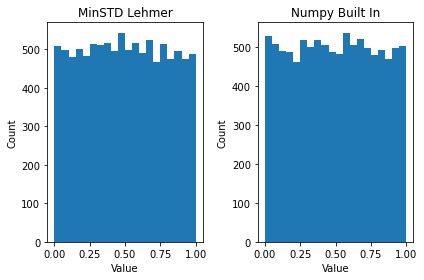

In [30]:
question1(19)

As we can see, the two histograms are very close to uniform, which shows that even though the number generators are peusdorandom and not truely random, they perform well enough that the results are close to random. Another point to show is that even though we take a large sample of 10000 points, since we picked a seed that is coprime to the modulo number, the MinSTD Lehmer method is guaranteed to have a full cycle, which means it will produce all the numbers between 0 and $2^{31}-1$ before repeating. This means that the spread of our numbers will be good with no repeats, resulting in a close to uniform distribution. Similarly, numpy's built-in method also has large cycles, so with 10000 points we would not have repeats, leading to a close to uniform distribution.

If we pick a seed that is not coprime (for example 18), we will still see close to uniform, but there is no guarantee of a full cycle, which tends to lead to more repeats of numbers and more values in certain bins.

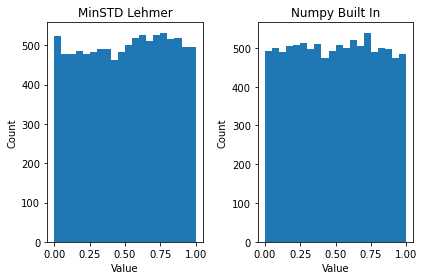

In [40]:
question1(18)

## Question 2
We want to generate 10000 uniform [0,1] values with the MinSTD Lehmer Peusdorandom Number Generator discussed in Question 1 and then imitate the fluctuation of price on a financial asset by setting probabilities to each uniform random value. 
We create another array that converts each value of the uniform values that we produce into a change in price. Since 30% of the time the price stays the same, we set 0 <= x < 0.3 to 0. 45% of the time the price goes up by 100, so we set values 0.3 <= x < 0.75 to 100. 25% of the time the price goes down by 200, so we set values 0.75 <= x <= 1 to -200. We then graph the Probability Distribution Function or PDF on the left, which shows how often each individual value occurred, as well as the Emperical Distribution or CDF on the left, which is the cumulation of these values as time passes.

(array([2450.,    0.,    0.,    0., 2983., 4566.]), array([-200, -150, -100,  -50,    0,   50,  100]), <BarContainer object of 6 artists>)


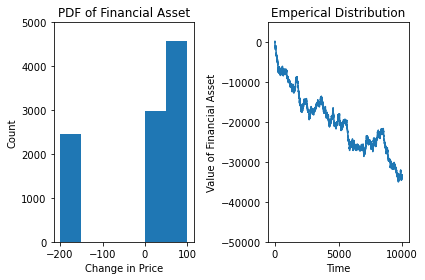

In [57]:
question2(19)

As we can see from the left, -200 occurs ~24.5% of the time, 0 occurs ~29.8% of the time, and 100 occurs ~45.6% of the time, showing that our pesudorandom number generator from Question 1 is close to uniform. We also can calculate what the expected value of the cdf is after 10000 points by finding the expected value of one point, which is 0.3*(0) + 0.45*(100) + 0.25*(-200) = -5. Thus, with 10000 points, on average we would have around -50000. In this case we got a bit more +100 and a bit less -200, so our emperical distribution's end value is only ~ -33,000. If we pick another coprime as the seed, we can view a different but similar result.

(array([2501.,    0.,    0.,    0., 3003., 4495.]), array([-200, -150, -100,  -50,    0,   50,  100]), <BarContainer object of 6 artists>)


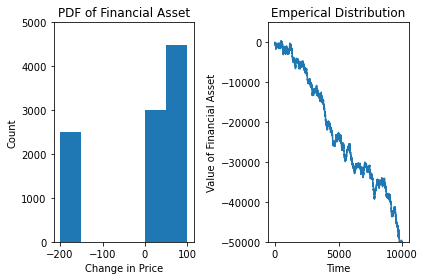

In [58]:
question2(21)

This time we got very close to the distribution we wanted of 25%, 30%, and 45%, so we got the expected value of -50000 on the right graph.

## Question 3
We want to generate 5000 binomial random variables of 70 trials and probability 0.7 by using bernoulli variables. Bernoulli random variables are random variables that simulate a single trial and output 0 or 1 based on the probability. In this case, we'll be using bernoulli variables that have a 30% chance of being 0, and 70% chance of being 1, similar to flipping a weighted coin. Since a binomial random variable is assuming that we are doing a bernoulli trial multiple times, we simulate binomial random variables with n = 70 by doing 70 bernoulli trials and adding their outputs up to get one binomial random variable. We then do this 5000 times to get 5000 binomial random variables.

0.5504


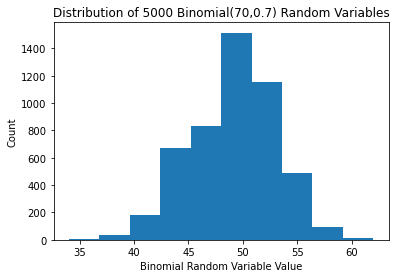

In [82]:
question3()

Here we see the distribution of binomial random variables that we got from doing 70 bernoulli trials with p = 0.7 for each binomial random variable. We also printed the proportion of values that are less than 50, which in this case is 55.04% of the binomial random variables are less than 50. We can calculate the theoretical value, which comes from the formula 
<h3><center>$p_{x}$ = ${n \choose x} p^{x}q^{n-x}$</center></h3>
Where p = 0.7, q = 0.3. Since we want x < 50, we want to add P(0) + P(1) + ... + P(49). We calculate this with the following function to get the following result:

In [84]:
binomial(50)

0.5449796328698386


So the theoretical probability of a binomial random value is less than 50 is 54.49%. We got 55.04% for our data, which is close, showing that our estimation is close to the expected probability that the binomial random value is less than 50.

## Question 4
We generate 5000 normal-Gaussian points with python's numpy's random number generator. Python uses PCG as their peusdorandom number generator to generate pesudorandom points, in this case in a normal distribution. 

[-1.19193783 -0.54734581 -0.08479099 ... -0.08671383  0.59062606
  1.5727378 ]
5000


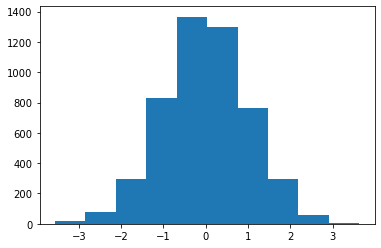

In [63]:
question4()

As we can see, we have created 5000 points from the size of the array, and when we plot them into histogram bins, we can see that it creates a bell shape, which is standard for the normal distribution. This bell shape occurs because the mean, median, and mode of the data is in the center and the data is close to symmetrical around this central area, creating a bell shape where a lot more points occur in the center compared to the sides. Running it again will show similar results with a different seed.

[-0.31360748 -0.10922751  1.23893443 ...  1.066613    0.45599991
  0.4029854 ]
5000


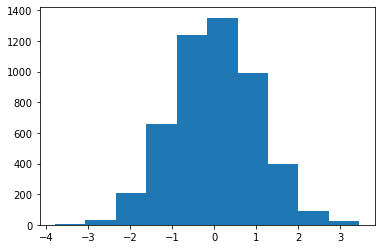

In [64]:
question4()

## Question 5
Here we want to calculate the minimum number of random uniform (0,1) variables such that the sum of these variables exceed 1. We will simulate this through Monte Carlo by doing N trials and getting the average, showing the estimate for N = 10, 100, ..., 1000000

         simple_monte_carlo_estimate  cpu_time     error confidence_intervals
N                                                                            
10                          2.500000  0.000703  0.218282       (2.318, 2.682)
100                         2.720000  0.005780  0.001718       (2.664, 2.776)
1000                        2.707000  0.016064  0.011282       (2.689, 2.725)
10000                       2.703900  0.080862  0.014382        (2.698, 2.71)
100000                      2.717610  0.475461  0.000672       (2.716, 2.719)
1000000                     2.718335  4.764884  0.000053       (2.718, 2.719)


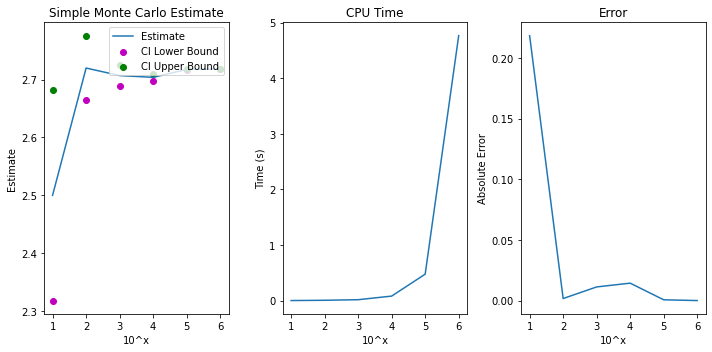

In [117]:
data, trials, table = question_5()
print(table)

As we can see from the table and the graphs, as N increases in size, the confidence_interval gets smaller in width and the estimate converges to a value close to e, which is approximately ~2.718. This means it takes approximately e amount of uniform distributed random variables for its sum to exceed 1. As N increases, the error gets smaller as the estimate gets closer to the e. However, the cpu time gets much larger as N gets larger, going from 0.47 seconds at $10^{5}$ to 4.76 seconds at $10^{6}$

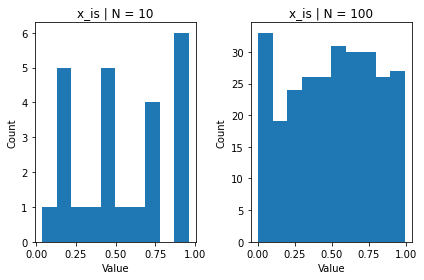

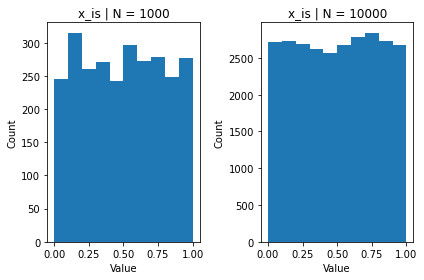

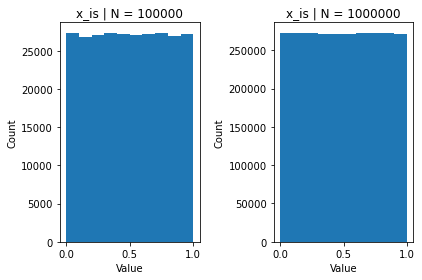

In [118]:
printData(data, trials)

The histograms above show our generated data that we used. The generated data consists of x_is where X is uniform(0, 1). We can notice that as N increases, especially when large, the histograms reflect data that is much more uniformly distributed. Note that N is the number of trials of calculating the minimum number of uniform random variables to exceed the sum of 1, not the number of random variables produced.

## Question 6
Here we want to compute P(V > 5), where V is a standard Gaussian random variable, or a variable sampled from N(0,1). We will first be doing a simple Monte Carlo technique where we sample V N times, where N = 10, 100, ..., 1000000. We then count the number of times this value is larger than 5, and divide by the total number of trials to get the probability. 

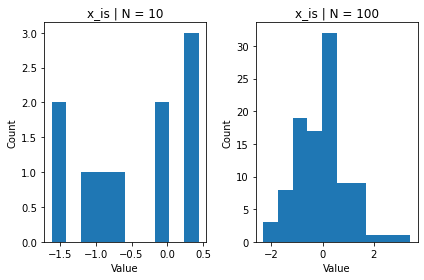

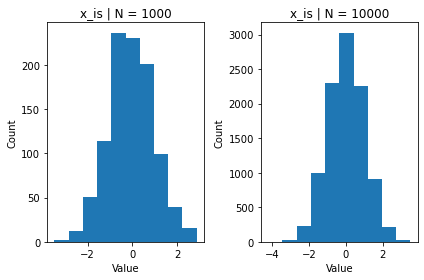

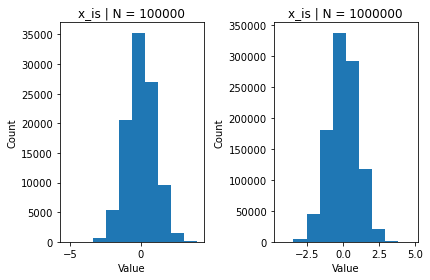

In [174]:
data = generate_and_plot_question_six_a_data()

The histograms above show our generated data that we used. The generated data consists of x_is where X is N(0, 1). We can notice that as N increases, especially when large, the histograms reflect data that is much more normally distributed.

,simple_monte_carlo_estimate,cpu_time,error,confidence_intervals
N,,,,
10,0.0,0.000032,0.000032,"(-0.464, 0.464)"
100,0.0,0.000059,0.000059,"(-0.191, 0.191)"
1000,0.0,0.000530,0.000530,"(-0.062, 0.062)"
10000,0.0,0.005792,0.005792,"(-0.019, 0.019)"
100000,0.0,0.040642,0.040642,"(-0.006, 0.006)"
1000000,0.0,0.195430,0.195430,"(-0.002, 0.002)"


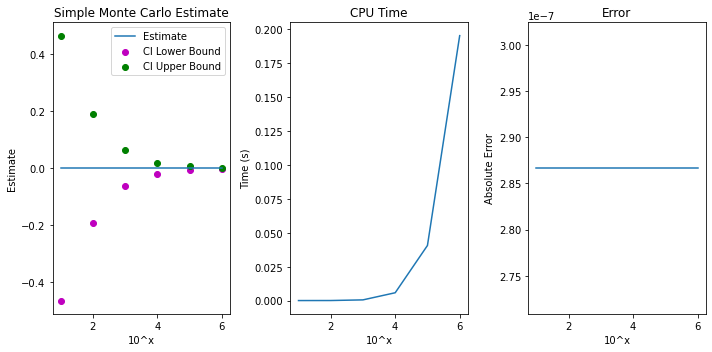

In [175]:
question_six_a(data)

Monte Carlo Sampling Methods are effective when we are sampling often in the region of importance. However, since P(V > 5) is near the tail of the normal distribution, this means that there is a very small region that is important when it comes to sampling. This causes the simple Monte Carlo Sampling Method to not get any samples of data, so even though the actual value of P(V>5) is around $2.86e^{-7}$, the actual estimates that the Monte Carlo Sampling Method give are 0 since it never samples in the important region.

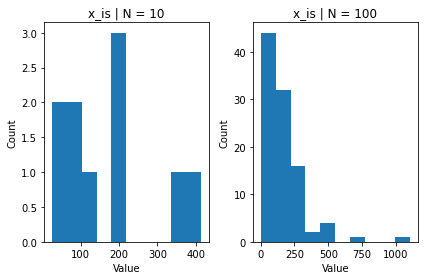

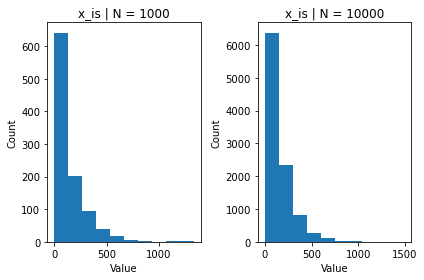

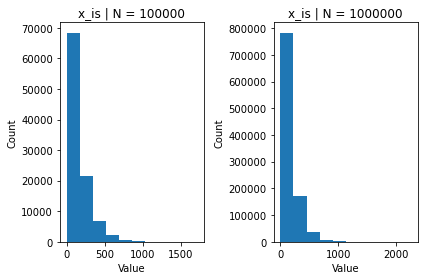

In [176]:
data = generate_and_plot_question_six_b_data()

For Importance Sampling Method, we pick a new function q(x) that looks like the importance region that we will be sampling. Since we are looking at the tail of a Normal Gaussian distribution, an exponential function that is shifted will capture the importance region of this sampling. We use q(x) = $e^(-x+5)$ to have our exponential distribution be centered around the area that we want to observe, which is P(V > 5). As N gets larger, it looks more like an exponential distribution.

,simple_monte_carlo_estimate,cpu_time,error,confidence_intervals
N,,,,
10,1.141980e-21,0.000266,0.000266,"(-76.03, 76.03)"
100,0.000000e+00,0.000146,0.000146,"(-31.002, 31.002)"
1000,0.000000e+00,0.000727,0.000727,"(-9.2, 9.2)"
10000,0.000000e+00,0.006895,0.006895,"(-2.89, 2.89)"
100000,0.000000e+00,0.045752,0.045752,"(-0.923, 0.923)"
1000000,0.000000e+00,0.203954,0.203954,"(-0.291, 0.291)"


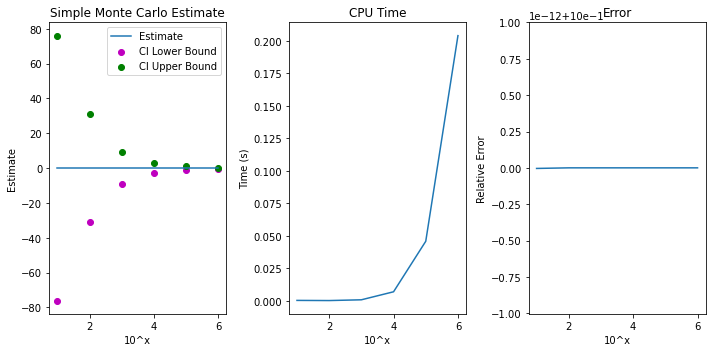

In [178]:
question_six_b(data)

Importance sampling goes as follows: we sample from our new q(x) that looks similar to the important region of our distribution. We then check if it is greater than 5, and then we add weight given by W(x) = p(x)/q(x) = $(1/ \sqrt{2\pi}) * e^{-0.5x^{2} + x - 5}$

In our case, we can see that we were able to produce results that were non-zero in the Monte Carlo Estimates. While P(V > 5) is very close to 0, we were able to reduce the error by getting a value that is non 0 for our simulations. However, once N got larger, since we were getting very few points in the important region and we were dividing by a large value N, this lead to underflow and causing the monte carlo estimates to be 0. Overall, this method worked better than the simple method since we were able to get more samples within the important region of P(V > 5).

## Appendix

In [177]:
import matplotlib.pyplot as plt
import math
import numpy as np
import time
import pandas as pd
from scipy.stats import norm, expon

def lehmer(seed):
    x = [seed]
    a = math.pow(7,5)
    c = 0
    m = math.pow(2,31) - 1
    for i in range(1,10000):
        temp = (a * x[i-1] + c)%m
        x.append(temp)
    uniform = [u / m for u in x]
    return uniform

def question1(seed):
    uniform = lehmer(seed)
    fig, axs = plt.subplots(1, 2, tight_layout=True)
    n_bins=20
    axs[0].hist(uniform, bins=n_bins)
    axs[0].set_title("MinSTD Lehmer")
    axs[0].set_xlabel("Value")
    axs[0].set_ylabel("Count")

    built_in = np.random.uniform(0.0,1.0,10000)
    axs[1].hist(built_in, bins=n_bins)
    axs[1].set_title("Numpy Built In")
    axs[1].set_xlabel("Value")
    axs[1].set_ylabel("Count")
    
def question2(seed):
    uniform = lehmer(seed)
    pdf = []
    cdf = [0]
    x = [0]
    for i in range(1,10000):
        x.append(i)
        if uniform[i] < 0.3:
            pdf.append(0)
            cdf.append(cdf[i-1])
        elif uniform[i] < 0.75:
            pdf.append(100)
            cdf.append(cdf[i-1]+100)
        else:
            pdf.append(-200)
            cdf.append(cdf[i-1]-200)
    fig, axs = plt.subplots(1, 2, tight_layout=True)
    bins_list = [-200, -150, -100, -50, 0, 50, 100]
    count = axs[0].hist(pdf, bins=bins_list)
    print(count)
    axs[0].set_title("PDF of Financial Asset")
    axs[0].set_xlabel("Change in Price")
    axs[0].set_ylabel("Count")
    axs[0].set_ylim([0,5000])

    axs[1].plot(x,cdf)
    axs[1].set_title("Emperical Distribution")
    axs[1].set_xlabel("Time")
    axs[1].set_ylabel("Value of Financial Asset")
    axs[1].set_ylim([-50000, 5000])

def question3():
    binomialRV = []
    for i in range(5000):
        bernoulli = np.random.binomial(1, 0.7, 70)
        estBinomial = sum(bernoulli)
        binomialRV.append(estBinomial)
    plt.hist(binomialRV)
    plt.title("Distribution of 5000 Binomial(70,0.7) Random Variables")
    plt.xlabel("Binomial Random Variable Value")
    plt.ylabel("Count")
    numLessThan50 = [x for x in binomialRV if x < 50]
    print(len(numLessThan50)/5000.)

def binomial(success):
    probability = 0
    for i in range(success):
        nchooseX = math.comb(70,i)
        temp = nchooseX * (0.7)**i * (0.3)**(70-i)
        probability = probability + temp
    print(probability)

def question4():
    normal = np.random.normal(0.0,1.0,5000)
    print(normal)
    print(normal.size)
    plt.hist(normal)
    plt.title("Normal Gaussian Distribution")
    plt.xlabel("Value")
    plt.ylabel("Count")
    
def question_5():
    simple_monte_carlo_estimates = []
    times = []
    confidence_intervals = []
    all_data = []
    trials = [10,100,1000,10000,100000, 1000000]
    for trial in trials:
        start_time = time.time()
        data = []
        runningCount = 0;
        for j in range(trial):
            total = 0
            count = 0
            while total <= 1:
                x = np.random.uniform(0,1)
                count = count + 1
                total = total + x
                data.append(x)
            runningCount = runningCount + count
        estimate = runningCount / trial
        simple_monte_carlo_estimates.append(estimate)
        end_time = time.time()
        time_taken = end_time - start_time
        times.append(time_taken)
        sample_std = np.std(data)
        (lb, ub) = estimate - 1.96 * sample_std / np.sqrt(trial), estimate + 1.96 * sample_std / np.sqrt(trial)
        confidence_intervals.append((np.round(lb, 3), np.round(ub, 3)))
        all_data.append(data)
    fig, axs = plt.subplots(1, 3, tight_layout=True, figsize=(10, 5))
    
    ci_lower_bounds = [x for (x,y) in confidence_intervals]
    ci_upper_bounds = [y for (x,y) in confidence_intervals]
    error = [abs(math.exp(1) - x) for x in simple_monte_carlo_estimates]
    
    axs[0].plot(np.log10(trials), simple_monte_carlo_estimates, label='Estimate')
    axs[0].scatter(np.log10(trials), ci_lower_bounds, c='m', label='CI Lower Bound')
    axs[0].scatter(np.log10(trials), ci_upper_bounds, c='g', label='CI Upper Bound')
    axs[0].set_title('Simple Monte Carlo Estimate')
    axs[0].set_xlabel('10^x')
    axs[0].set_ylabel('Estimate')
    axs[0].legend(loc='upper right')

    axs[1].plot(np.log10(trials), times)
    axs[1].set_title('CPU Time')
    axs[1].set_xlabel('10^x')
    axs[1].set_ylabel('Time (s)')
    
    axs[2].plot(np.log10(trials), error)
    axs[2].set_title('Error')
    axs[2].set_xlabel('10^x')
    axs[2].set_ylabel('Absolute Error')
    
    df = pd.DataFrame(index=trials)
    df.index.name = 'N'
    df['simple_monte_carlo_estimate'] = simple_monte_carlo_estimates
    df['cpu_time'] = times
    df['error'] = error
    df['confidence_intervals'] = confidence_intervals
    return all_data, trials, df

def printData(data,trials):
    for i in range(0,6,2):
        j = i + 1
        fig, axs = plt.subplots(1, 2, tight_layout=True)
        n1 = trials[i]
        n2 = trials[j]
        axs[0].hist(data[i])
        axs[0].set_title("x_is | N = {}".format(n1))
        axs[0].set_xlabel("Value")
        axs[0].set_ylabel("Count")
        axs[1].hist(data[j])
        axs[1].set_title("x_is | N = {}".format(n2))
        axs[1].set_xlabel("Value")
        axs[1].set_ylabel("Count")

def generate_and_plot_question_six_a_data():
    N = np.power(np.full(6, 10), range(1, 7))
    data = []

    for n in N:
        x_is = np.random.normal(0, 1, n)

        data.append(x_is)
        
        
    for i in range(0,6,2):
        j = i + 1
        fig, axs = plt.subplots(1, 2, tight_layout=True)
        n1 = trials[i]
        n2 = trials[j]
        axs[0].hist(data[i])
        axs[0].set_title("x_is | N = {}".format(n1))
        axs[0].set_xlabel("Value")
        axs[0].set_ylabel("Count")
        axs[1].hist(data[j])
        axs[1].set_title("x_is | N = {}".format(n2))
        axs[1].set_xlabel("Value")
        axs[1].set_ylabel("Count")
        
    return data

def generate_and_plot_question_six_b_data():
    N = np.power(np.full(6, 10), range(1, 7))
    data = []
    for n in N:
        x_is = np.random.exponential(1,n)
        x_is = x_is * math.exp(5)
        data.append(x_is)
        
        
    for i in range(0,6,2):
        j = i + 1
        fig, axs = plt.subplots(1, 2, tight_layout=True)
        n1 = trials[i]
        n2 = trials[j]
        axs[0].hist(data[i])
        axs[0].set_title("x_is | N = {}".format(n1))
        axs[0].set_xlabel("Value")
        axs[0].set_ylabel("Count")
        axs[1].hist(data[j])
        axs[1].set_title("x_is | N = {}".format(n2))
        axs[1].set_xlabel("Value")
        axs[1].set_ylabel("Count")
        
    return data

def question_six_a(data):
    simple_monte_carlo_estimates = []
    times = []
    confidence_intervals = []
    N = np.power(np.full(6, 10), range(1, 7))
    idx = range(len(N))
    
    for i in idx:
        start_time = time.time()
        n = N[i]
        
        # estimate
        x_is = data[i]
        good_data = len([x for x in x_is if x > 5])
        estimate = good_data/n
        simple_monte_carlo_estimates.append(estimate)
        
        # time
        end_time = time.time()
        time_taken = end_time - start_time
        times.append(time_taken)
        
        #CI
        sample_std = np.std(x_is)
        (lb, ub) = estimate - 1.96 * sample_std / np.sqrt(n), estimate + 1.96 * sample_std / np.sqrt(n)
        confidence_intervals.append((np.round(lb, 3), np.round(ub, 3)))

    fig, axs = plt.subplots(1, 3, tight_layout=True, figsize=(10, 5))
    
    ci_lower_bounds = [x for (x,y) in confidence_intervals]
    ci_upper_bounds = [y for (x,y) in confidence_intervals]
    expected = 1 - norm(0,1).cdf(5)
    error = [abs(expected-actual) for actual in simple_monte_carlo_estimates]
    
    axs[0].plot(np.log10(N), simple_monte_carlo_estimates, label='Estimate')
    axs[0].scatter(np.log10(N), ci_lower_bounds, c='m', label='CI Lower Bound')
    axs[0].scatter(np.log10(N), ci_upper_bounds, c='g', label='CI Upper Bound')
    axs[0].set_title('Simple Monte Carlo Estimate')
    axs[0].set_xlabel('10^x')
    axs[0].set_ylabel('Estimate')
    axs[0].legend(loc='upper right')
    
    axs[1].plot(np.log10(N), times)
    axs[1].set_title('CPU Time')
    axs[1].set_xlabel('10^x')
    axs[1].set_ylabel('Time (s)')
    
    # FIX ERROR
    axs[2].plot(np.log10(N), error)
    axs[2].set_title('Error')
    axs[2].set_xlabel('10^x')
    axs[2].set_ylabel('Absolute Error')
    
    df = pd.DataFrame(index=N)
    df.index.name = 'N'
    df['simple_monte_carlo_estimate'] = simple_monte_carlo_estimates
    df['cpu_time'] = times
    df['error'] = times
    df['confidence_intervals'] = confidence_intervals
    
    return df

def question_six_b(data):
    simple_monte_carlo_estimates = []
    times = []
    confidence_intervals = []
    N = np.power(np.full(6, 10), range(1, 7))
    idx = range(len(N))
    def weight(x):
        return 1/math.sqrt(2*math.pi) * math.exp(-0.5*x**2 + x - 5)
    for i in idx:
        start_time = time.time()
        n = N[i]
        
        # estimate
        x_is = data[i]
        good_data = len([x for x in x_is if x > 5])
        w = np.vectorize(weight)
        final_data = w(good_data)
        estimate = final_data/n
        simple_monte_carlo_estimates.append(estimate)
        
        # time
        end_time = time.time()
        time_taken = end_time - start_time
        times.append(time_taken)
        
        #CI
        sample_std = np.std(x_is)
        (lb, ub) = estimate - 1.96 * sample_std / np.sqrt(n), estimate + 1.96 * sample_std / np.sqrt(n)
        confidence_intervals.append((np.round(lb, 3), np.round(ub, 3)))

    fig, axs = plt.subplots(1, 3, tight_layout=True, figsize=(10, 5))
    
    ci_lower_bounds = [x for (x,y) in confidence_intervals]
    ci_upper_bounds = [y for (x,y) in confidence_intervals]
    expected = 1 - norm(0,1).cdf(5)
    error = [abs(expected-actual)/expected for actual in simple_monte_carlo_estimates]
    
    axs[0].plot(np.log10(N), simple_monte_carlo_estimates, label='Estimate')
    axs[0].scatter(np.log10(N), ci_lower_bounds, c='m', label='CI Lower Bound')
    axs[0].scatter(np.log10(N), ci_upper_bounds, c='g', label='CI Upper Bound')
    axs[0].set_title('Simple Monte Carlo Estimate')
    axs[0].set_xlabel('10^x')
    axs[0].set_ylabel('Estimate')
    axs[0].legend(loc='upper right')
    
    axs[1].plot(np.log10(N), times)
    axs[1].set_title('CPU Time')
    axs[1].set_xlabel('10^x')
    axs[1].set_ylabel('Time (s)')
    
    # FIX ERROR
    axs[2].plot(np.log10(N), error)
    axs[2].set_title('Error')
    axs[2].set_xlabel('10^x')
    axs[2].set_ylabel('Relative Error')
    
    df = pd.DataFrame(index=N)
    df.index.name = 'N'
    df['simple_monte_carlo_estimate'] = simple_monte_carlo_estimates
    df['cpu_time'] = times
    df['error'] = times
    df['confidence_intervals'] = confidence_intervals
    
    return df